# 回归算法挑战

预测住宅物业的销售价格取决于许多因素，包括物业的年龄、当地设施的可用性和位置。

在这个挑战中，你将使用一个房地产销售交易的数据集，根据房产的特点来预测其每单位的价格。该数据中的单价是基于3.3平方米的单位测量。

> **引用**。本练习中使用的数据源自于以下研究。
>
> *Yeh, I. C., & Hsu, T. K. (2018). 通过基于案例的推理，用比较的方法建立房地产估值模型。应用软计算，65，260-271.*。
>
> 这是从UCI数据集库中获得的（Dua, D. and Graff, C. (2019). [UCI机器学习资源库](http://archive.ics.uci.edu/ml)。加州欧文市。加州大学信息与计算机科学学院）。

## 审查数据

运行下面的单元格来加载数据并查看前几行。

In [110]:
import pandas as pd

# load the training dataset
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


该数据由以下变量组成。

- **transaction_date** - 交易日期（例如，2013.250=2013年3月，2013.500=2013年6月，等等）。
- **house_age** - 房龄（以年为单位）。
- **transit_distance** - 到最近的轻轨站的距离（以米为单位）。
- **local_convenience_stores** -步行距离内的便利店数量
- **latitude** -地理坐标，纬度
- **longitude** -地理坐标，经度
- **price_per_unit**单位面积（3.3平方米）的房屋价格

## 训练一个回归模型

你的挑战是探索和准备数据，确定有助于预测**price_per_unit**标签的预测特征，并训练一个回归模型，在针对测试数据子集进行评估时，达到你能达到的最低均方根误差（RMSE）（必须小于**7**）。

根据需要添加标记和代码单元来创建你的解决方案。

In [111]:
# Your code to explore data and train a regression model

In [112]:
# 让我们通过检查一些关键的描述性统计来开始我们的数据分析。
numeric_features=["transaction_date",'transaction_date','house_age','transit_distance','local_convenience_stores','latitude','longitude']
data[numeric_features+['price_per_unit']].describe()

,transaction_date,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


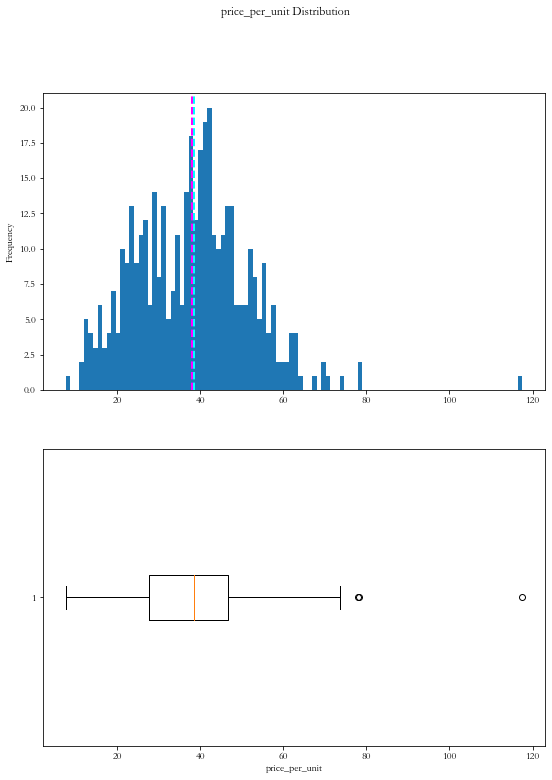

In [113]:
# 我们可以通过数据的可视化来更清楚地了解租用数量的分布。
import pandas as pd
import matplotlib.pyplot as plt

# 这将确保在Jupyter笔记本中内联显示
%matplotlib inline

# 获取标签栏
label = data['price_per_unit']


# 为2个子类别（2行，1列）创建一个图
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# 绘制柱状图  
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# 添加平均数、中位数和模式的线条
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# 绘制boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('price_per_unit')

# 为图标添加一个标题
fig.suptitle('price_per_unit Distribution')

# 展示
fig.show()

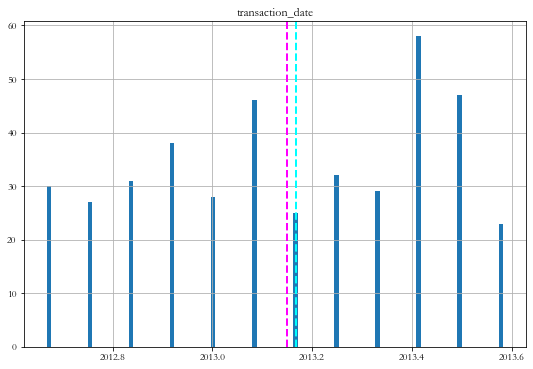

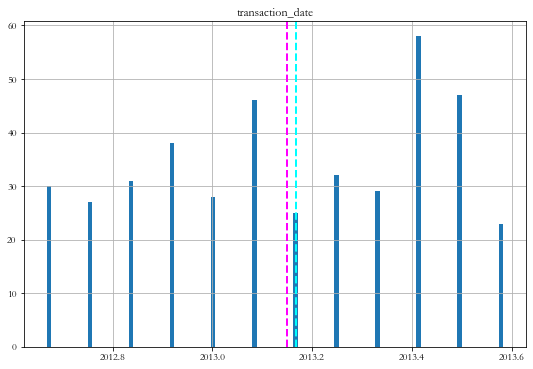

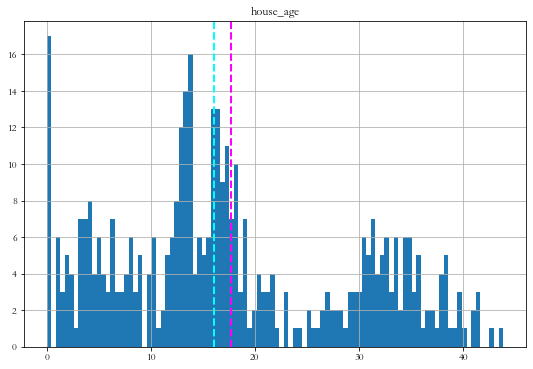

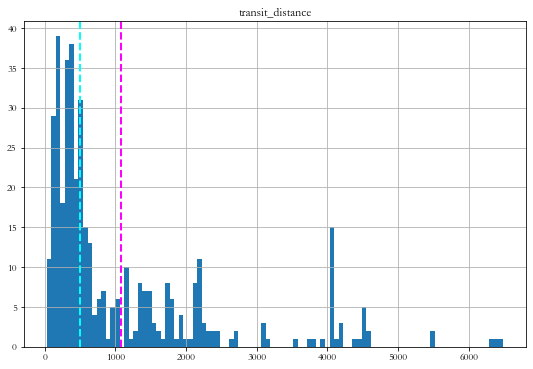

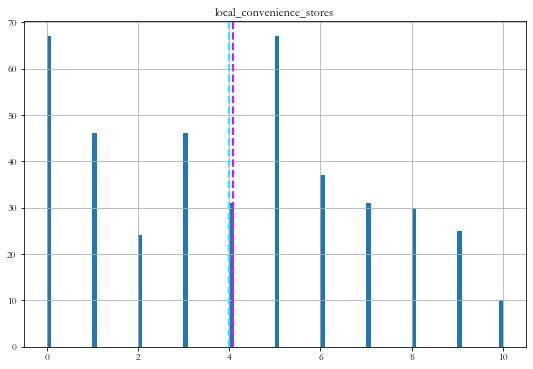

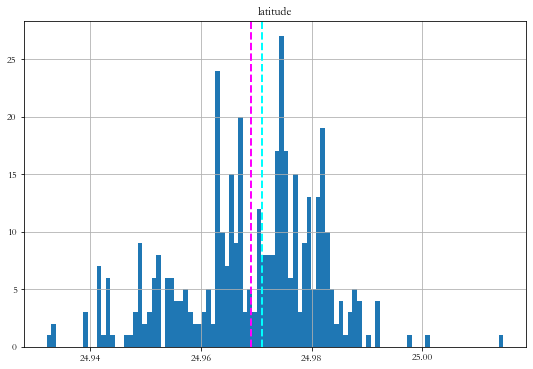

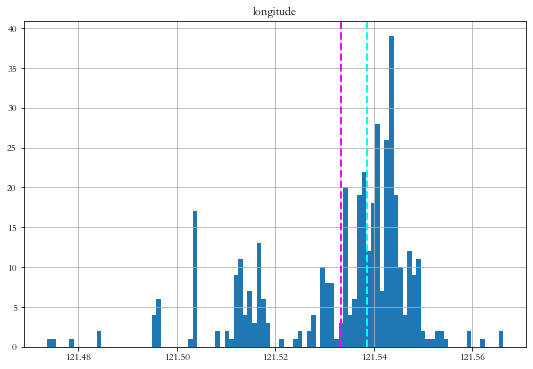

In [114]:
# 让我们为这些数据分别创建一个直方图。
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

我们已经探讨了数据集中数字值的分布，但是分类特征呢？
我们可以绘制一个条形图，显示每个类别的每个离散值的数量。

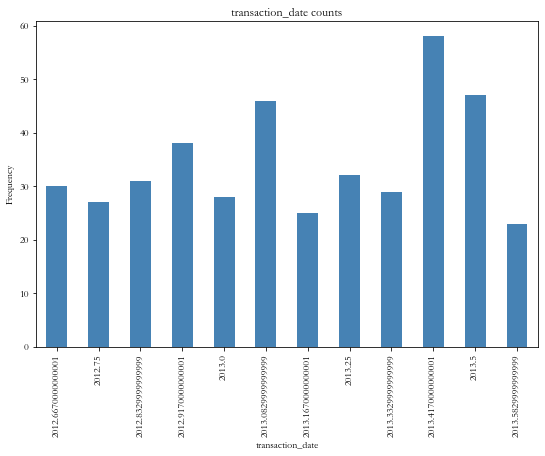

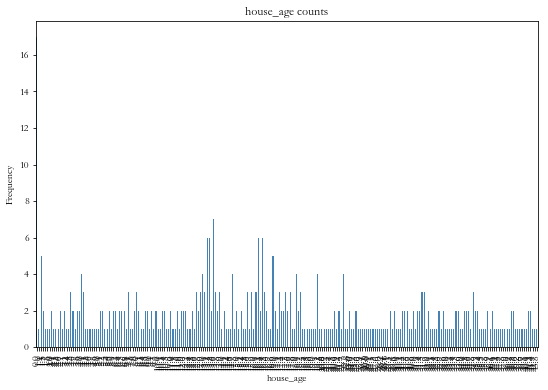

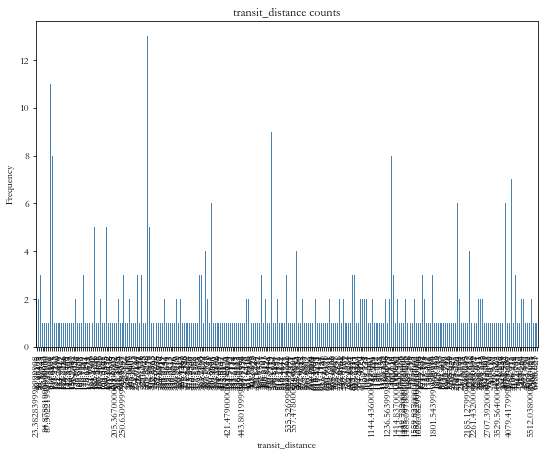

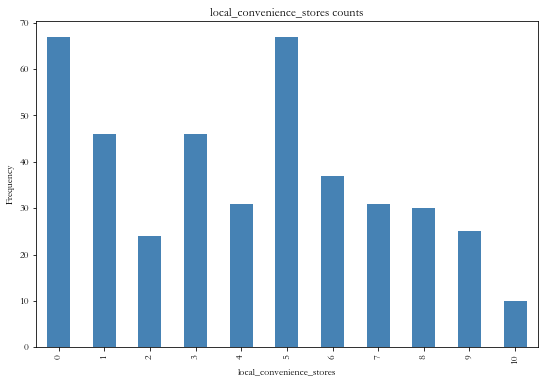

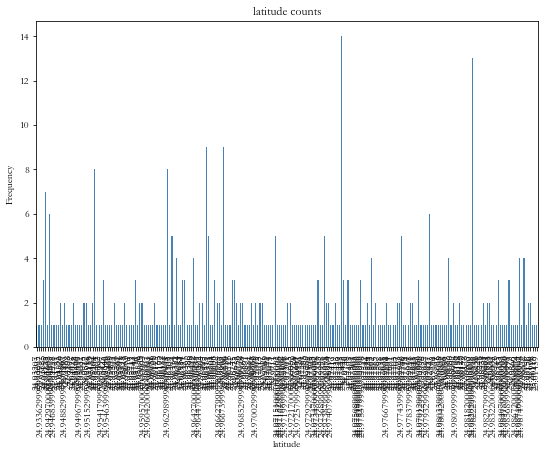

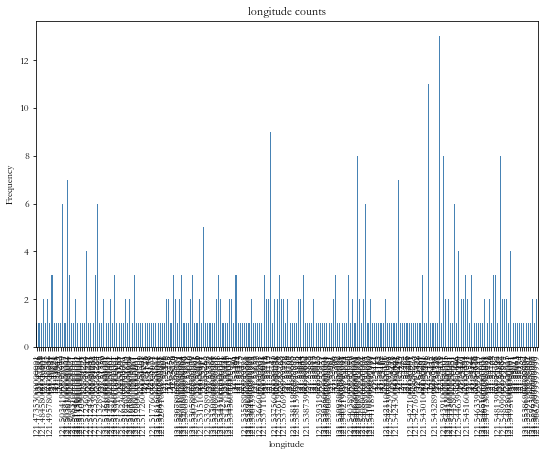

In [115]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['transaction_date','house_age','transit_distance','local_convenience_stores','latitude','longitude']

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

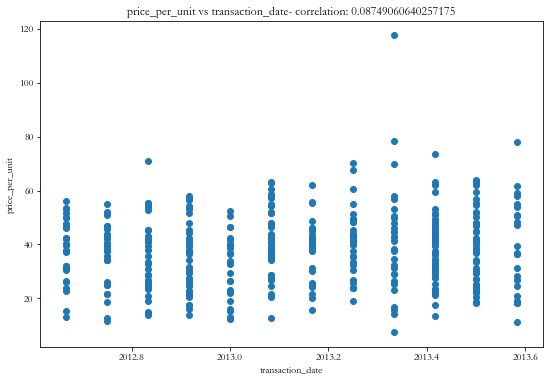

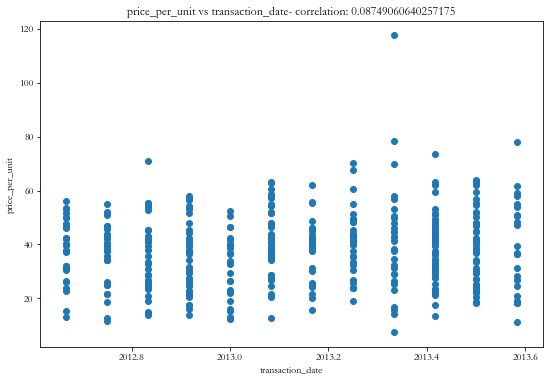

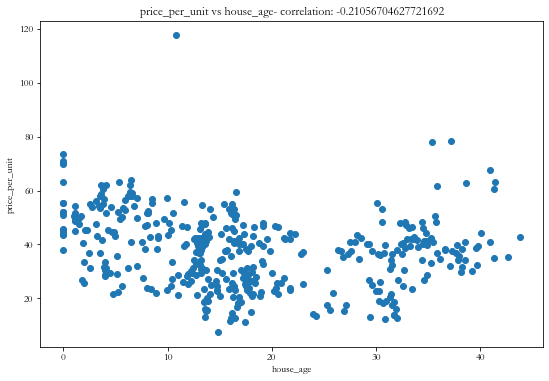

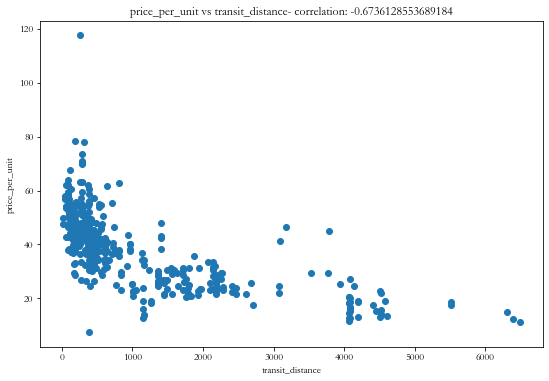

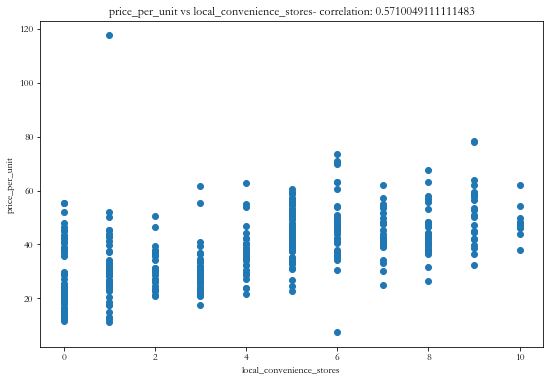

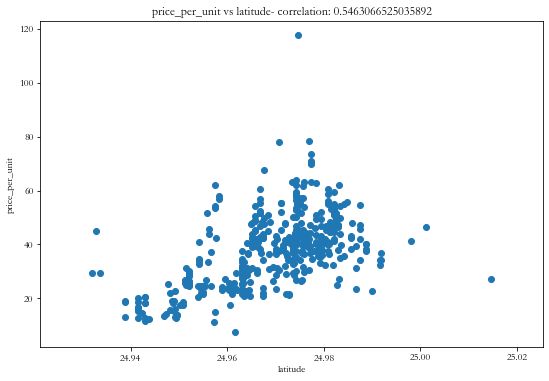

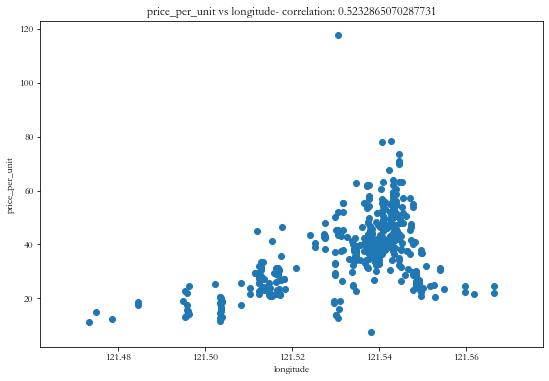

In [116]:
# 对于数字特征，我们可以创建散点图，显示特征和标签值的交叉点。我们还可以计算相关统计量来量化明显的关系。
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('price_per_unit')
    ax.set_title('price_per_unit vs ' + col + '- correlation: ' + str(correlation))
plt.show()

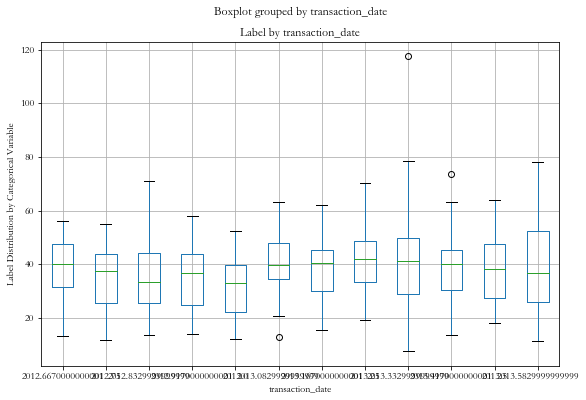

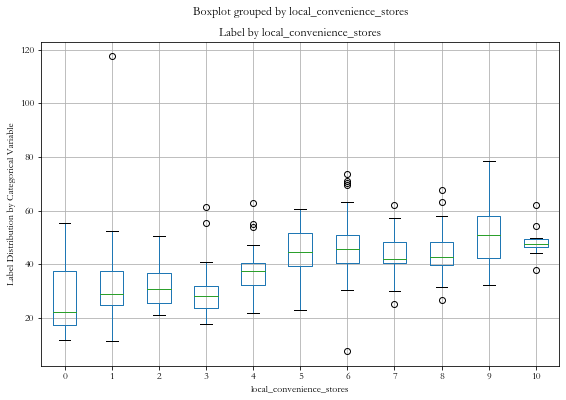

In [153]:
for col in data[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
plt.show()

In [134]:
# 我们想用来训练模型的特征和我们想让它预测的标签分开。
features = list(data.columns[0:-1])
target = data.columns[-1]
print(features)
print(target)

['transaction_date', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']
price_per_unit


In [122]:
train_df = data[features].copy()
test_df = data[target].copy()

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df, test_df, test_size=0.3, random_state=42)

In [155]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [48. 16. 46. 16. 47. 39. 48. 38. 53. 41.]
Actual labels   :  358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
72     36.3
262    53.0
140    51.4
93     16.1
70     59.0
Name: price_per_unit, dtype: float64


In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, accuracy_score, make_scorer, mean_squared_error

alg = GradientBoostingRegressor()
params = {
    'learning_rate': [0.1,0.5,1.0],
    'n_estimators': [50, 100, 150]    
}

score = make_scorer(r2_score)
gridSearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridSearch.fit(x_train, y_train)
print('Best Parameter Combination: ', gridSearch.best_params_, '\n')
model = gridSearch.best_estimator_
print('Best Model: ', model, '\n')
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

Best Parameter Combination:  {'learning_rate': 0.1, 'n_estimators': 50} 

Best Model:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 45.47869019982973
RMSE: 6.743789009142392
R2: 0.7280391173039104


/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, accuracy_score, make_scorer, mean_squared_error

alg = RandomForestRegressor(random_state=42)
params = {
    'max_depth': [4,5,6,7],
    'n_estimators': [50, 100, 150, 200]    
}

score = make_scorer(r2_score)
gridSearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridSearch.fit(x_train, y_train)
print('Best Parameter Combination: ', gridSearch.best_params_, '\n')
model = gridSearch.best_estimator_
print('Best Model: ', model, '\n')
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameter Combination:  {'max_depth': 6, 'n_estimators': 200} 

Best Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False) 

MSE: 43.83876100670317
RMSE: 6.6210845793346556
R2: 0.7378458331297644


In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

numeric_features = [0,1,2,3,4,5]
numeric_transform = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transform, numeric_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=42, max_depth=5))
])

model = pipeline.fit(x_train, y_train)
print(model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5])],
                                   verbose=False)),
                ('regressor',
                 RandomForestRegres

MSE: 45.10677184291902
RMSE: 6.716157520704753
R2: 0.7302631753010049


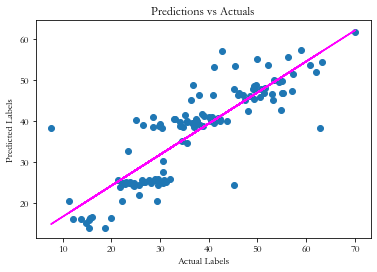

In [159]:
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [160]:
import joblib

# 将模型保存为一个pickle文件
filename = 'bike-share.pkl'
joblib.dump(model, filename)

['bike-share.pkl']

In [161]:
X_new = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348],
                  [2013.000,13.6,4082.015,0,24.94155,121.5038]])
results = model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
46.88
15.95


##使用训练好的模型

保存你的训练模型，然后用它来预测以下房地产交易的每单位价格。

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
# 来吧

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=259c0b31-83b0-40c3-9697-6997f75bdbbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>